# Objectives:

 - Analyze the dataset in the given CSV file
 - Clean the given dataset
 - Load the dataset into sqlite database engine
 - Execute different SQL queries

###   Data Preparation

The given dataset has 10,000 records for the customers purchases and is used to predict
customers shopping patterns and to provide answers for ad-hoc queries. The goal is to improve the revenue and the effectiveness of the marketing campaign of the electronic products. The dataset DirtyData4BestDeal10000.csv has been drawn from the database of customers.

In [1]:
# load libraries
import pandas as pd  
import numpy as np  
import sqlalchemy
from sqlalchemy import create_engine
from sqlalchemy import inspect

# set up notebook to display multiple output in one cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

### Reading the dirtydata4bestdeal CSV and loading into a dataframe object

In [2]:
dirtydata=pd.read_csv('DirtyData4BestDeal10000.csv')

# check out the variables
dirtydata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ZipCode             9856 non-null   float64
 1   CustomerAge         9856 non-null   float64
 2   SamsungTV46LED      10000 non-null  int64  
 3   SonyTV42LED         9984 non-null   object 
 4   XBOX360             9992 non-null   object 
 5   DellLaptop          9968 non-null   object 
 6   BoseSoundSystem     9981 non-null   object 
 7   BoseHeadSet         9976 non-null   float64
 8   SonyHeadSet         9976 non-null   float64
 9   iPod                9968 non-null   float64
 10  iPhone              9984 non-null   float64
 11  Panasonic50LED      9992 non-null   float64
 12  SonyPS4             9999 non-null   float64
 13  WiiU                9976 non-null   float64
 14  WDexternalHD        9985 non-null   float64
 15  SamsungTV55LED      9984 non-null   float64
 16  SonyT

In [3]:
dirtydata.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
2,60611.0,23.0,1,NaN,0,1,0,NaN,1.0,1.0,...,0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
4,30303.0,25.0,1,NaN,0,NaN,1,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,10.0,0


### Using boxplot to visualize the data and get an idea if there are dirty/messy/invalid data

<AxesSubplot:>

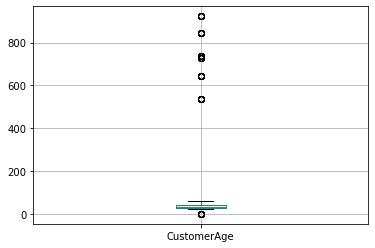

In [4]:
# check out customer age
dirtydata.boxplot(column='CustomerAge')

<AxesSubplot:>

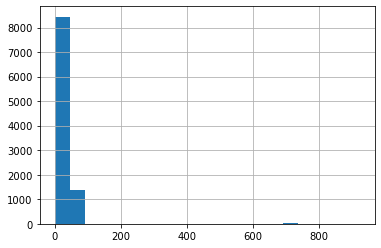

In [5]:
# check out customer age with a histogram
dirtydata['CustomerAge'].hist(bins=20)

In [6]:
# look at details of LenenovaLaptop
dirtydata.LenevoLaptop.describe()

count    9976.000000
mean        0.629711
std         0.627375
min         0.000000
25%         0.000000
50%         1.000000
75%         1.000000
max        11.000000
Name: LenevoLaptop, dtype: float64

<AxesSubplot:>

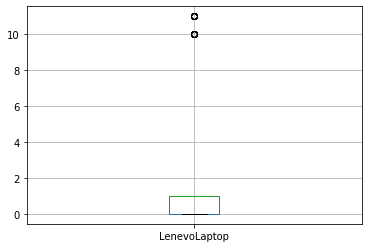

In [7]:
dirtydata.boxplot(column='LenevoLaptop')

<AxesSubplot:>

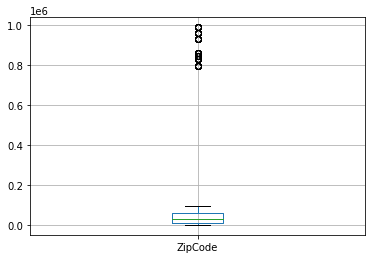

In [8]:
# look at zip codes
dirtydata.boxplot(column='ZipCode')

### Cleaning the dirty/messy data in the dirtydata dataframe object

In [9]:
# what is the shape of clean data before manipulating it?
dirtydata.shape

# Droping the NaN values
cleandata = dirtydata.dropna()
cleandata.shape
cleandata.head()

(10000, 34)

(9432, 34)

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134.0,35.0,1,1,1,0,0,1.0,1.0,0.0,...,1,0.0,1.0,1.0,1.0,1.0,0.0,1.0,1.0,1
1,62791.0,43.0,0,1,0,0,1,0.0,1.0,0.0,...,1,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,1
3,60616.0,56.0,0,1,1,1,0,0.0,1.0,1.0,...,0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0
5,2108.0,55.0,1,1,1,1,10,0.0,0.0,0.0,...,1,1.0,1.0,1.0,1.0,1.0,0.0,1.0,0.0,0
6,90033.0,44.0,1,1,1,1,0,0.0,0.0,0.0,...,1,1.0,1.0,1.0,0.0,1.0,1.0,0.0,0.0,1


In [10]:
# ----------------------------------------------------------------------------------

# Add the rest of your code here to clean the data
# - eliminate NA's
cleandata.dtypes
cleandata['SonyTV42LED'] = pd.to_numeric((cleandata['SonyTV42LED']),errors = 'coerce')
cleandata['XBOX360'] = pd.to_numeric((cleandata['XBOX360']), errors ='coerce')
cleandata['DellLaptop'] = pd.to_numeric((cleandata['DellLaptop']), errors = 'coerce')
cleandata['BoseSoundSystem'] = pd.to_numeric((cleandata['BoseSoundSystem']), errors = 'coerce')
# - product values should only be either a 0 or a 1
cleandata= cleandata[cleandata.SamsungTV46LED <= 1]
cleandata= cleandata[cleandata.SonyTV42LED <= 1]
cleandata= cleandata[cleandata.XBOX360 <= 1]
cleandata= cleandata[cleandata.DellLaptop <= 1]
cleandata= cleandata[cleandata.BoseSoundSystem<= 1]
cleandata= cleandata[cleandata.BoseHeadSet <= 1]
cleandata= cleandata[cleandata.SonyHeadSet <= 1]
cleandata= cleandata[cleandata.iPod <= 1]
cleandata= cleandata[cleandata.iPhone <= 1]
cleandata= cleandata[cleandata.Panasonic50LED <= 1]
cleandata= cleandata[cleandata.SonyPS4 <= 1]
cleandata= cleandata[cleandata.WiiU <= 1]
cleandata= cleandata[cleandata.WDexternalHD <= 1]
cleandata= cleandata[cleandata.SamsungTV55LED <= 1]
cleandata= cleandata[cleandata.SonyTV60LED <= 1]
cleandata= cleandata[cleandata.SandiskMemoryCard <= 1]
cleandata= cleandata[cleandata.SonySoundSystem <= 1]
cleandata= cleandata[cleandata.SonyCamera <= 1]
cleandata= cleandata[cleandata.PanasonicCamera <= 1]
cleandata= cleandata[cleandata.HPPrinter <= 1]
cleandata= cleandata[cleandata.SonyDVDplayer <= 1]
cleandata= cleandata[cleandata.ToshibaDVDplayer <= 1]
cleandata= cleandata[cleandata.GalaxyTablet <= 1]
cleandata= cleandata[cleandata.SurfaceTablet <= 1]
cleandata= cleandata[cleandata.HPLaptop <= 1]
cleandata= cleandata[cleandata.HDMICable <= 1]
cleandata= cleandata[cleandata.SpeakerCable <= 1]
cleandata= cleandata[cleandata.CallOfDutyGame <= 1]
cleandata= cleandata[cleandata.ASUSLaptop <= 1]
cleandata= cleandata[cleandata.LenevoLaptop <= 1]
cleandata= cleandata[cleandata.TVStandWallMount <= 1]
# - customer's age needs to be valid
cleandata= cleandata[cleandata.CustomerAge >= 18]
cleandata= cleandata[cleandata.CustomerAge <= 100]
# - zipcodes should have 5 digits
cleandata= cleandata[cleandata.ZipCode <= 99999]
cleandata= cleandata[cleandata.ZipCode > 9999]
# - all numbers should be integers
cleandata=cleandata.astype(int)
cleandata

# Optional steps
# - if there are other things you want to clean, clearly document them
#   and run them in this section before you create a database


# ----------------------------------------------------------------------------------




ZipCode               float64
CustomerAge           float64
SamsungTV46LED          int64
SonyTV42LED            object
XBOX360                object
DellLaptop             object
BoseSoundSystem        object
BoseHeadSet           float64
SonyHeadSet           float64
iPod                  float64
iPhone                float64
Panasonic50LED        float64
SonyPS4               float64
WiiU                  float64
WDexternalHD          float64
SamsungTV55LED        float64
SonyTV60LED           float64
SandiskMemoryCard     float64
SonySoundSystem       float64
SonyCamera              int64
PanasonicCamera         int64
HPPrinter             float64
SonyDVDplayer         float64
ToshibaDVDplayer      float64
GalaxyTablet            int64
SurfaceTablet         float64
HPLaptop              float64
HDMICable             float64
SpeakerCable          float64
CallOfDutyGame        float64
GrandTheftAutoGame    float64
ASUSLaptop            float64
LenevoLaptop          float64
TVStandWal

<ipython-input-10-6983c1a8d52e>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandata['SonyTV42LED'] = pd.to_numeric((cleandata['SonyTV42LED']),errors = 'coerce')
<ipython-input-10-6983c1a8d52e>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleandata['XBOX360'] = pd.to_numeric((cleandata['XBOX360']), errors ='coerce')
<ipython-input-10-6983c1a8d52e>:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134,35,1,1,1,0,0,1,1,0,...,1,0,1,1,1,1,0,1,1,1
1,62791,43,0,1,0,0,1,0,1,0,...,1,0,1,0,1,1,0,1,1,1
3,60616,56,0,1,1,1,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
6,90033,44,1,1,1,1,0,0,0,0,...,1,1,1,1,0,1,1,0,0,1
13,62791,27,1,1,0,1,0,0,0,0,...,1,1,1,0,0,1,0,1,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9991,60611,59,0,1,1,1,0,0,1,1,...,1,1,1,0,0,1,1,0,0,1
9993,90033,38,1,1,1,0,1,1,1,0,...,1,0,1,1,0,0,0,1,1,0
9995,33129,22,1,0,0,1,0,1,1,0,...,1,0,1,1,1,1,1,0,0,1
9996,90024,21,0,1,1,1,0,0,1,1,...,1,0,1,1,1,0,0,1,1,0


<AxesSubplot:>

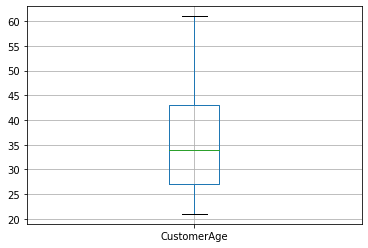

In [11]:
# Doublechecking if the data is clean
cleandata.boxplot(column='CustomerAge')


<AxesSubplot:>

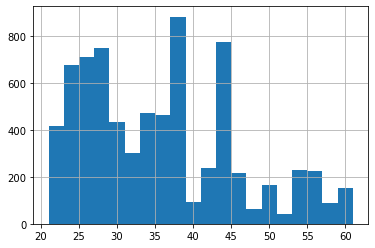

In [12]:
cleandata['CustomerAge'].hist(bins=20)

### Storing  the cleaned data into the Database

In [13]:
# Checking the shape
cleandata.shape

(7376, 34)

In [14]:
# Storing data 

engine = create_engine('sqlite:///bestdeal.db')

In [15]:
cleandata.to_sql('trans4cust', engine, if_exists = 'replace', index = False)

In [16]:
insp = inspect(engine)

In [17]:
insp.get_table_names()

['trans4cust']

In [18]:
pd.read_sql_table('trans4cust', engine).columns

Index(['ZipCode', 'CustomerAge', 'SamsungTV46LED', 'SonyTV42LED', 'XBOX360',
       'DellLaptop', 'BoseSoundSystem', 'BoseHeadSet', 'SonyHeadSet', 'iPod',
       'iPhone', 'Panasonic50LED', 'SonyPS4', 'WiiU', 'WDexternalHD',
       'SamsungTV55LED', 'SonyTV60LED', 'SandiskMemoryCard', 'SonySoundSystem',
       'SonyCamera', 'PanasonicCamera', 'HPPrinter', 'SonyDVDplayer',
       'ToshibaDVDplayer', 'GalaxyTablet', 'SurfaceTablet', 'HPLaptop',
       'HDMICable', 'SpeakerCable', 'CallOfDutyGame', 'GrandTheftAutoGame',
       'ASUSLaptop', 'LenevoLaptop', 'TVStandWallMount'],
      dtype='object')

### Quering the Database

#### Getting the transactions for the customers in zipCode 60616

In [19]:
q1 = pd.read_sql_query("SELECT * \
                FROM trans4cust \
                WHERE ZipCode='60616'", engine)

q1.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,60616,56,0,1,1,1,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
1,60616,43,0,1,1,0,1,0,1,0,...,1,0,1,1,1,1,0,1,1,1
2,60616,54,1,0,0,1,0,1,1,0,...,0,1,1,0,1,1,0,1,1,1
3,60616,43,1,1,1,0,1,1,1,0,...,1,1,1,1,0,1,0,1,1,1
4,60616,31,0,1,1,1,0,0,1,1,...,1,0,1,1,1,1,1,0,0,1


#### Geting the transactions for ALL customers

In [20]:
q2 = pd.read_sql_query("SELECT * \
                FROM trans4cust", engine)

q2.head()

,ZipCode,CustomerAge,SamsungTV46LED,SonyTV42LED,XBOX360,DellLaptop,BoseSoundSystem,BoseHeadSet,SonyHeadSet,iPod,...,GalaxyTablet,SurfaceTablet,HPLaptop,HDMICable,SpeakerCable,CallOfDutyGame,GrandTheftAutoGame,ASUSLaptop,LenevoLaptop,TVStandWallMount
0,30134,35,1,1,1,0,0,1,1,0,...,1,0,1,1,1,1,0,1,1,1
1,62791,43,0,1,0,0,1,0,1,0,...,1,0,1,0,1,1,0,1,1,1
2,60616,56,0,1,1,1,0,0,1,1,...,0,0,1,0,1,0,0,1,0,0
3,90033,44,1,1,1,1,0,0,0,0,...,1,1,1,1,0,1,1,0,0,1
4,62791,27,1,1,0,1,0,0,0,0,...,1,1,1,0,0,1,0,1,1,1


#### Geting the number of customers in every ZipCode sorted by ZipCode

In [21]:
q3 = pd.read_sql_query("SELECT ZipCode , COUNT(*) as 'num_customers' \
            FROM trans4cust \
            GROUP BY ZipCode \
            ORDER BY ZipCode", engine)

q3.head()

,ZipCode,num_customers
0,10065,755
1,30134,1133
2,30303,985
3,33129,532
4,33130,280


#### Getting the number of customers for  every Age Group in ZipCode 60616 sorted by CustomerAge

In [22]:
q4 = pd.read_sql_query(
        "SELECT CustomerAge , COUNT(*) as 'num_customers' \
        FROM trans4cust \
        WHERE ZipCode=60616 \
        GROUP BY CustomerAge  \
        ORDER BY CustomerAge", engine)

q4.head()

,CustomerAge,num_customers
0,21,56
1,22,32
2,23,40
3,25,88
4,26,48


#### Ploting in a stacked-bar figure the number of customers who bought SonyTV60LED and/or BoseSoundSystem in  every zipcode that has more than 400 customers who bought these two products(either bought one of these products or the two products)

In [23]:
SonyTV60LEDCustTrans = pd.read_sql_query(
    "SELECT ZipCode , COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE SonyTV60LED=1  \
    GROUP BY ZipCode \
    HAVING COUNT(*) > 400", engine)

BoseSoundSystemCustTrans = pd.read_sql_query(
    "SELECT ZipCode , COUNT(*) as 'num_customers'\
    FROM trans4cust \
    WHERE BoseSoundSystem=1 \
    GROUP BY ZipCode \
    HAVING COUNT(*) > 400", engine)

In [24]:
SonyTV60LEDCustTrans

,ZipCode,num_customers
0,10065,439
1,30134,757
2,30303,517
3,60616,689


In [25]:
BoseSoundSystemCustTrans

,ZipCode,num_customers
0,30134,799
1,30303,464
2,60616,466
3,90033,404


In [26]:
SonyTV60LEDCustTrans.ZipCode


0    10065
1    30134
2    30303
3    60616
Name: ZipCode, dtype: int64

In [27]:
import numpy

#   There are zipcodes that Sony got bought but not Bose but there are also zipcodes that Bose got bought but not Sony
#
#   Using stacked-bar graph, we have a potentially asymmetrical set  of zipcode values
#   Creating the symmteric set of zipcode values for Sony and Bose


sonyZipCodeTuples = tuple(SonyTV60LEDCustTrans.ZipCode.astype(numpy.int))
sony_num_customersTuples = tuple(SonyTV60LEDCustTrans.num_customers.astype(numpy.int))

boseZipCodeTuples = tuple(BoseSoundSystemCustTrans.ZipCode.astype(numpy.int))
bose_num_customersTuples = tuple(BoseSoundSystemCustTrans.num_customers.astype(numpy.int))

sony_dict = dict(zip(sonyZipCodeTuples, sony_num_customersTuples))
bose_dict = dict(zip(boseZipCodeTuples, bose_num_customersTuples))

for key in bose_dict.keys():
    if ((key in sony_dict.keys()) == False): sony_dict[key]=0
        
for key in sony_dict.keys():
    if ((key in bose_dict.keys()) == False): bose_dict[key]=0
        
bose_zip = sorted(bose_dict.keys())

sony_zip = sorted(sony_dict.keys())

bose_zip_tuple = tuple(bose_zip)

sony_zip_tuple = tuple(sony_zip)

bose_customer_list = []

for bose in bose_zip_tuple:
    bose_customer_list.append(bose_dict[bose])

sony_customer_list = []

for sony in sony_zip_tuple:
    sony_customer_list.append(sony_dict[sony])

bose_customer_tuple = tuple(bose_customer_list)
sony_customer_tuple = tuple(sony_customer_list)


Text(0, 0.5, 'Number of Customers')

Text(0.5, 0, 'Zip Code')

Text(0.5, 1.0, 'Number of Customers by ZipCode and 2 Products')

([<matplotlib.axis.XTick at 0x7fdc38b00430>,
 [Text(0.5, 0, '10065'),
  Text(1.5, 0, '30134'),
  Text(2.5, 0, '30303'),
  Text(3.5, 0, '60616'),
  Text(4.5, 0, '90033')])

([<matplotlib.axis.YTick at 0x7fdc38b00cd0>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

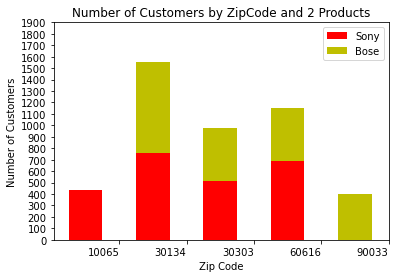

In [28]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

ind = np.arange(len(sony_customer_tuple))    

# the width of the bars: can also be len(x) sequence
width = .5

p1 = plt.bar(ind, sony_customer_tuple, width,  color='r')
p2 = plt.bar(ind, bose_customer_tuple, width, color='y', bottom=sony_customer_tuple)

plt.ylabel('Number of Customers')
plt.xlabel('Zip Code')

plt.title('Number of Customers by ZipCode and 2 Products')

plt.xticks(ind + width, sony_zip_tuple, horizontalalignment='right')

plt.yticks(np.arange(0, 2000, 100))
plt.legend((p1[0], p2[0]), ('Sony', 'Bose'))

plt.show()

#### Alternative code

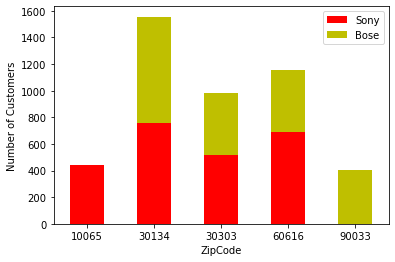

In [29]:
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline 

df =pd.merge(SonyTV60LEDCustTrans, BoseSoundSystemCustTrans, 
         on='ZipCode',how='outer').fillna(0)
#df

df.columns = ['ZipCode', 'Sony', 'Bose'];
df.set_index('ZipCode').plot(kind='bar',stacked=True,
                             rot = 0, color=['r','y']);
plt.ylabel('Number of Customers');
plt.show();

#### Showing the shape of data and the variable types of data. 

In [30]:
cleandata.shape
cleandata.info()

(7376, 34)

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7376 entries, 0 to 9999
Data columns (total 34 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   ZipCode             7376 non-null   int64
 1   CustomerAge         7376 non-null   int64
 2   SamsungTV46LED      7376 non-null   int64
 3   SonyTV42LED         7376 non-null   int64
 4   XBOX360             7376 non-null   int64
 5   DellLaptop          7376 non-null   int64
 6   BoseSoundSystem     7376 non-null   int64
 7   BoseHeadSet         7376 non-null   int64
 8   SonyHeadSet         7376 non-null   int64
 9   iPod                7376 non-null   int64
 10  iPhone              7376 non-null   int64
 11  Panasonic50LED      7376 non-null   int64
 12  SonyPS4             7376 non-null   int64
 13  WiiU                7376 non-null   int64
 14  WDexternalHD        7376 non-null   int64
 15  SamsungTV55LED      7376 non-null   int64
 16  SonyTV60LED         7376 non-null   int64


#### Using SQL/SQLite to show the top 3 zip codes with the most customers.  

In [31]:
top_3_zip_codes = pd.read_sql_query(
    '''SELECT ZipCode , COUNT(*) as 'num_customers' \
    FROM trans4cust \
    GROUP BY ZipCode \
    ORDER BY num_customers DESC\
    LIMIT 3''', engine)
    

top_3_zip_codes

,ZipCode,num_customers
0,30134,1133
1,30303,985
2,60616,951


#### Using SQL/SQLite to find the ages of the customers for just the top 3 zip codes. Sorting the output by highest count on top.

In [32]:
top_3_zip_codes_and_age = pd.read_sql_query(
    '''SELECT CustomerAge , COUNT(*) as 'num_customers' \
    FROM trans4cust \
    WHERE ZipCode IN (SELECT ZipCode \
        FROM trans4cust \
        GROUP BY ZipCode \
        ORDER BY COUNT(*) DESC\
        LIMIT 3) \
    GROUP BY CustomerAge  \
    ORDER BY CustomerAge''', engine)

    
    
top_3_zip_codes_and_age

,CustomerAge,num_customers
0,21,88
1,22,80
2,23,148
3,24,27
4,25,277
5,26,133
6,27,153
7,28,99
8,29,214
9,30,7


#### Using SQL/SQLite getting the number of customers that bought both a DellLaptop and HPPrinter. Showing the results for every age and sort the output by age so that the oldest customers are shown at the top.

In [33]:
DellLaptop_and_HPPrinter = pd.read_sql_query(
    '''SELECT CustomerAge, COUNT(*) as 'num_customers'\
    FROM trans4cust\
    WHERE DellLaptop=1 AND HPPrinter=1\
    GROUP BY CustomerAge\
    ORDER BY CustomerAge''', engine)

DellLaptop_and_HPPrinter

,CustomerAge,num_customers
0,21,179
1,22,171
2,23,242
3,25,64
4,26,159
5,27,225
6,28,48
7,29,124
8,31,122
9,32,173


#### Using SQL/SQLite to show how many customers are in the 25 and under group <br>
b) Of these customers, how many iPods were purchased? How many CallOfDutyGame were purchased? <br>
c) How many customers are in the 55 and over group? <br>
d) Of these customers, how many iPods were purchased? How many CallOfDutyGame were purchased? <br>

In [34]:
twentyfive_and_under_group = pd.read_sql_query(
    '''SELECT COUNT(*) as 'num_customers'\
    FROM trans4cust\
    Where customerAge <= 25''', engine)
twentyfive_and_under_group

,num_customers
0,1517


#### Showing how many iPods were purchased by those customers.

In [35]:
iPods_were_purchased = pd.read_sql_query(
    '''SELECT COUNT(*) as 'num_customers'\
    FROM trans4cust \
    Where customerAge <= 25\
    AND iPod >= 1.0''', engine)
iPods_were_purchased

,num_customers
0,243


#### Showing how many CallOfDutyGame were purchased by those customers.

In [36]:
CallOfDutyGame_were_purchased = pd.read_sql_query(
    '''SELECT COUNT(*) as 'num_customers'\
    FROM trans4cust\
    Where customerAge <= 25\
    AND CallOfDutyGame >= 1.0''', engine)
CallOfDutyGame_were_purchased

,num_customers
0,1392


#### Showing how many customers are in the 55 and over group

In [37]:
fiftyfive_and_over_group = pd.read_sql_query(
    '''SELECT COUNT(*) as 'num_customers'\
    FROM trans4cust \
    Where customerAge >= 55''', engine)
fiftyfive_and_over_group

,num_customers
0,467


#### Showing how many iPods were purchased by those customers.

In [38]:
iPods_were_purchased_by55 = pd.read_sql_query(
    '''SELECT COUNT(*) as 'num_customers'\
    FROM trans4cust \
    Where customerAge >= 55\
    AND iPod >= 1.0''', engine)
iPods_were_purchased_by55

,num_customers
0,266


#### Showing how many CallOfDutyGame were purchased by those customers.

In [39]:
CallOfDutyGame_were_purchased_by55 = pd.read_sql_query(
    '''SELECT COUNT(*) as 'num_customers'\
    FROM trans4cust \
    Where customerAge >= 55\
    AND CallOfDutyGame >= 1.0''', engine)
CallOfDutyGame_were_purchased_by55

,num_customers
0,305


#### Using SQL/SQLite to plot in a stacked-bar figure the number of customers who bought HPLaptop and/or HPPrinter but did NOT buy WDexternalHD for every CustomerAge group that has more than 100 customers who bought these two products(either bought one of these products or the two products but didn't buy WDexternalHD).

,CustomerAge,num_customers
0,21,171
1,22,171
2,23,350
3,25,134
4,26,179
5,27,246
6,28,102
7,29,256
8,31,125
9,32,167


,CustomerAge,num_customers
0,21,171
1,22,161
2,23,350
3,25,134
4,26,179
5,27,228
6,28,102
7,29,256
8,31,125
9,32,167


Text(0, 0.5, 'Number of Customers')

Text(0.5, 0, 'Customer Age')

Text(0.5, 1.0, 'Number of Customers by Customer Age and 2 Products')

([<matplotlib.axis.XTick at 0x7fdc3848f550>,
 [Text(0.5, 0, '21'),
  Text(1.5, 0, '22'),
  Text(2.5, 0, '23'),
  Text(3.5, 0, '25'),
  Text(4.5, 0, '26'),
  Text(5.5, 0, '27'),
  Text(6.5, 0, '28'),
  Text(7.5, 0, '29'),
  Text(8.5, 0, '31'),
  Text(9.5, 0, '32'),
  Text(10.5, 0, '34'),
  Text(11.5, 0, '35'),
  Text(12.5, 0, '36'),
  Text(13.5, 0, '42'),
  Text(14.5, 0, '44'),
  Text(15.5, 0, '54'),
  Text(16.5, 0, '56')])

([<matplotlib.axis.YTick at 0x7fdc38088940>,
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

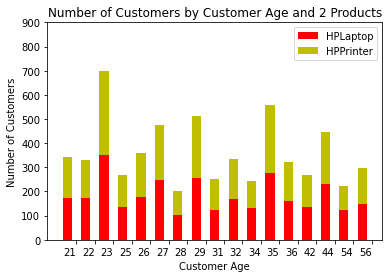

In [40]:
bought_HPLaptop=pd.read_sql_query(
         '''SELECT CustomerAge , COUNT(*) as 'num_customers' \
         FROM trans4cust \
         WHERE HPLaptop=1 AND WDexternalHD=0  \
         GROUP BY CustomerAge HAVING COUNT(*) > 100''', engine)

bought_HPPrinter=pd.read_sql_query(
         '''SELECT CustomerAge , COUNT(*) as 'num_customers'\
         FROM trans4cust\
         WHERE HPPrinter=1 AND WDExternalHD=0\
         GROUP BY CustomerAge HAVING COUNT(*) > 100''', engine)

bought_HPLaptop
bought_HPPrinter

import numpy

hpLaptopCustomerAgeTuples=tuple(bought_HPLaptop.CustomerAge.astype(numpy.int))
hpLaptop_num_customersTuples=tuple(bought_HPLaptop.num_customers.astype(numpy.int))

hpPrinterCustomerAgeTuples=tuple(bought_HPPrinter.CustomerAge.astype(numpy.int))
hpPrinter_num_customersTuples=tuple(bought_HPPrinter.num_customers.astype(numpy.int))

hpLaptop_dict = dict(zip(hpLaptopCustomerAgeTuples, hpLaptop_num_customersTuples))
hpPrinter_dict = dict(zip(hpPrinterCustomerAgeTuples, hpPrinter_num_customersTuples))

for key in hpLaptop_dict.keys():
    if ((key in hpPrinter_dict.keys()) == False): hpPrinter_dict[key]=0
for key in hpPrinter_dict.keys():
    if ((key in hpLaptop_dict.keys()) == False): hpLaptop_dict[key]=0
        
hpPrinter_age= sorted(hpPrinter_dict.keys())
hpLatop_age= sorted(hpLaptop_dict.keys())

hpLatop_age_tuple=tuple(hpLatop_age)
hpPrinter_age_tuple=tuple(hpPrinter_age)

hpLatop_customer_list=[]
for hpLatop in hpLatop_age_tuple: 
    hpLatop_customer_list.append(hpLaptop_dict[hpLatop])
    
hpPrinter_customer_list=[]
for hpPrinter in hpPrinter_age_tuple: 
    hpPrinter_customer_list.append(hpPrinter_dict[hpPrinter])
    
hpLaptop_customer_tuple=tuple(hpLatop_customer_list)
hpPrinter_customer_tuple=tuple(hpPrinter_customer_list)

import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
ind = np.arange(len(hpLaptop_customer_tuple)) 
width = .5
p1 = plt.bar(ind, hpLaptop_customer_tuple, width,  color='r')
p2 = plt.bar(ind, hpPrinter_customer_tuple, width, color='y', bottom=hpLaptop_customer_tuple)
plt.ylabel('Number of Customers')
plt.xlabel('Customer Age')
plt.title('Number of Customers by Customer Age and 2 Products')
plt.xticks(ind + width, hpLatop_age_tuple, horizontalalignment='right')
plt.yticks(np.arange(0, 1000, 100))
plt.legend((p1[0], p2[0]), ('HPLaptop', 'HPPrinter'))
plt.show()